#📌 Extracción

In [1]:
# Importar las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importar el dataset TelecomX
telecom = pd.read_json('TelecomX_Data.json')
telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Contar el total de filas y columnas
telecom.shape

(7267, 6)

In [4]:
# Información sobre el dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

##### NORMALIZACION DE COLUMNAS ANIDADAS

In [5]:
columnas = list(telecom.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [6]:
# Normalizar columnas anidadas que se encuentran en el dataframe

customer_telecom = pd.json_normalize(telecom['customer'])
phone_telecom = pd.json_normalize(telecom['phone'])
internet_telecom = pd.json_normalize(telecom['internet'])
account_telecom = pd.json_normalize(telecom['account'])


In [7]:
# Eliminar las columnas del dataframe visualizado al Importar el dataset TelecomX

telecom.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

In [8]:
# Expandir el dataframe telecom con las nuevas columnas normalizadas y  visualizar los cambios
telecom = pd.concat([telecom, customer_telecom, phone_telecom, internet_telecom, account_telecom], axis=1)
telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Numeros de columnas y filas
telecom.shape

(7267, 21)

##### ✅ Consultar el diccionario para comprender mejor el significado de las variables.

In [10]:
# Imprimir todas las columnas del dataframe telecom con sus respectivos nombres
telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [11]:
# Renombrar las columnas y verificar los cambios realizados
telecom = telecom.rename(columns = {
    'customerID':'Cliente_id',
    'Churn':'Cancelacion',
    'gender':'Genero',
    'SeniorCitizen':'Adulto_mayor',
    'Partner':'Tiene_pareja',
    'Dependents':'Tiene_dependientes',
    'tenure':'Meses_conectado',
    'PhoneService':'Servicio_telefono',
    'MultipleLines':'Lineas_multiples',
    'InternetService':'Servicio_internet',
    'OnlineSecurity':'Seguridad_en_linea',
    'OnlineBackup':'Respaldo_en_linea',
    'DeviceProtection':'Proteccion_dispositivo',
    'TechSupport':'Soporte_tecnico',
    'StreamingTV':'TV_streaming',
    'StreamingMovies':'Peliculas_streaming',
    'Contract':'Tipo_contrato',
    'PaperlessBilling':'Factura_electronica',
    'PaymentMethod':'Metodo_pago',
    'Charges.Monthly':'Cargos_mensuales',
    'Charges.Total':'Cargos_totales'
})


####  ✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [12]:
# Observacion de la informacion del dataframe deacuerdo a sus columnas tipos de datos y valores
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente_id              7267 non-null   object 
 1   Cancelacion             7267 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Adulto_mayor            7267 non-null   int64  
 4   Tiene_pareja            7267 non-null   object 
 5   Tiene_dependientes      7267 non-null   object 
 6   Meses_conectado         7267 non-null   int64  
 7   Servicio_telefono       7267 non-null   object 
 8   Lineas_multiples        7267 non-null   object 
 9   Servicio_internet       7267 non-null   object 
 10  Seguridad_en_linea      7267 non-null   object 
 11  Respaldo_en_linea       7267 non-null   object 
 12  Proteccion_dispositivo  7267 non-null   object 
 13  Soporte_tecnico         7267 non-null   object 
 14  TV_streaming            7267 non-null   

In [13]:
# Buscar en el dataframe valores duplicados
telecom[telecom.duplicated()]


,Cliente_id,Cancelacion,Genero,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Meses_conectado,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Factura_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales


In [14]:
# Conocer si hay valores duplicados
telecom.duplicated().sum()

np.int64(0)

In [15]:
# Buscar valores Nulos
telecom.isnull().sum()

Cliente_id                0
Cancelacion               0
Genero                    0
Adulto_mayor              0
Tiene_pareja              0
Tiene_dependientes        0
Meses_conectado           0
Servicio_telefono         0
Lineas_multiples          0
Servicio_internet         0
Seguridad_en_linea        0
Respaldo_en_linea         0
Proteccion_dispositivo    0
Soporte_tecnico           0
TV_streaming              0
Peliculas_streaming       0
Tipo_contrato             0
Factura_electronica       0
Metodo_pago               0
Cargos_mensuales          0
Cargos_totales            0
dtype: int64

In [16]:
telecom.reset_index(inplace=True, drop=True)
telecom.head()

,Cliente_id,Cancelacion,Genero,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Meses_conectado,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Factura_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
telecom.dtypes

Cliente_id                 object
Cancelacion                object
Genero                     object
Adulto_mayor                int64
Tiene_pareja               object
Tiene_dependientes         object
Meses_conectado             int64
Servicio_telefono          object
Lineas_multiples           object
Servicio_internet          object
Seguridad_en_linea         object
Respaldo_en_linea          object
Proteccion_dispositivo     object
Soporte_tecnico            object
TV_streaming               object
Peliculas_streaming        object
Tipo_contrato              object
Factura_electronica        object
Metodo_pago                object
Cargos_mensuales          float64
Cargos_totales             object
dtype: object

In [18]:
telecom['Cargos_totales'] = telecom['Cargos_totales'].str.replace('$', '').replace(',','').replace(' ', '').replace('', None)
# transformar los valores de la columna 'Cargos_totales' en un número decimal
telecom['Cargos_totales'] = telecom['Cargos_totales'].astype(float)
telecom['Cargos_totales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Cargos_totales
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [19]:
# distinguir cantidad de valores nulos y flotantes
telecom['Cargos_totales'].isna().value_counts()

Cargos_totales
False    7256
True       11
Name: count, dtype: int64

In [20]:
# crear una variable con los valores nulos y visualizar estos datos en el dataframe
cargos_totales_nulos = telecom['Cargos_totales'].isna() 
telecom[cargos_totales_nulos]

,Cliente_id,Cancelacion,Genero,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Meses_conectado,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Factura_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [21]:
# eliminar filas con valores nulos
telecom = telecom.drop(telecom[cargos_totales_nulos].index, axis= 0)

 # aplicar reset al indice
telecom = telecom.reset_index(drop=True)

In [22]:
telecom['Cargos_totales'].isna().value_counts()

Cargos_totales
False    7256
Name: count, dtype: int64

In [23]:
telecom.nunique().sort_values(ascending=False)

Cliente_id                7256
Cargos_totales            6530
Cargos_mensuales          1584
Meses_conectado             72
Metodo_pago                  4
Respaldo_en_linea            3
Proteccion_dispositivo       3
Tipo_contrato                3
Peliculas_streaming          3
TV_streaming                 3
Soporte_tecnico              3
Seguridad_en_linea           3
Cancelacion                  3
Servicio_internet            3
Lineas_multiples             3
Adulto_mayor                 2
Servicio_telefono            2
Factura_electronica          2
Tiene_dependientes           2
Tiene_pareja                 2
Genero                       2
dtype: int64

In [24]:
# verificando errores de formato
for val_columns in telecom.columns[1:]:
    print(f"{val_columns}: {telecom[val_columns].unique()}")
    print("=============================="*2)



Cancelacion: ['No' 'Yes' '']
Genero: ['Female' 'Male']
Adulto_mayor: [0 1]
Tiene_pareja: ['Yes' 'No']
Tiene_dependientes: ['Yes' 'No']
Meses_conectado: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
Servicio_telefono: ['Yes' 'No']
Lineas_multiples: ['No' 'Yes' 'No phone service']
Servicio_internet: ['DSL' 'Fiber optic' 'No']
Seguridad_en_linea: ['No' 'Yes' 'No internet service']
Respaldo_en_linea: ['Yes' 'No' 'No internet service']
Proteccion_dispositivo: ['No' 'Yes' 'No internet service']
Soporte_tecnico: ['Yes' 'No' 'No internet service']
TV_streaming: ['Yes' 'No' 'No internet service']
Peliculas_streaming: ['No' 'Yes' 'No internet service']
Tipo_contrato: ['One year' 'Month-to-month' 'Two year']
Factura_electronica: ['Yes' 'No']
Metodo_pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank tran

In [25]:
#limpieza columna id del cliente
telecom['Cliente_id'] = telecom['Cliente_id'].str.strip()
telecom['Cliente_id'].sample(6)

1754    2495-KZNFB
2031    2868-MZAGQ
3490    4826-XTSOH
6732    9290-SHCMB
845     1200-TUZHR
7157    9851-QXEEQ
Name: Cliente_id, dtype: object

In [26]:
# Limpieza de la columna tipo de contrato
telecom['Tipo_contrato'] = telecom['Tipo_contrato'].str.lower()


In [27]:
telecom['Tipo_contrato'] = telecom['Tipo_contrato'].str.replace(r'\-', ' ', regex=True)
telecom['Tipo_contrato'].sample(7)

3127    month to month
1386    month to month
1419          two year
3966    month to month
1268          two year
6293          two year
6512          two year
Name: Tipo_contrato, dtype: object

In [28]:
# limpieza de la columna Metodo_pago
telecom['Metodo_pago'] =telecom['Metodo_pago'].str.lower()
telecom['Metodo_pago'] = telecom['Metodo_pago'].str.replace(r'|', '', regex=True).str.strip()
telecom['Metodo_pago'].sample(6)

1313        mailed check
1767    electronic check
4808        mailed check
4893    electronic check
6831        mailed check
1145    electronic check
Name: Metodo_pago, dtype: object

In [29]:
telecom['Cancelacion'] = telecom['Cancelacion'].replace({'Yes': '1', 'No': '0', '': np.nan})
telecom['Cancelacion'] = telecom['Cancelacion'].astype('Int64')
telecom['Cancelacion'].value_counts()

Cancelacion
0    5163
1    1869
Name: count, dtype: Int64

In [30]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente_id              7256 non-null   object 
 1   Cancelacion             7032 non-null   Int64  
 2   Genero                  7256 non-null   object 
 3   Adulto_mayor            7256 non-null   int64  
 4   Tiene_pareja            7256 non-null   object 
 5   Tiene_dependientes      7256 non-null   object 
 6   Meses_conectado         7256 non-null   int64  
 7   Servicio_telefono       7256 non-null   object 
 8   Lineas_multiples        7256 non-null   object 
 9   Servicio_internet       7256 non-null   object 
 10  Seguridad_en_linea      7256 non-null   object 
 11  Respaldo_en_linea       7256 non-null   object 
 12  Proteccion_dispositivo  7256 non-null   object 
 13  Soporte_tecnico         7256 non-null   object 
 14  TV_streaming            7256 non-null   

In [31]:
telecom["Cuentas_diarias"] = telecom["Cargos_mensuales"]/30
telecom["Cuentas_diarias"].head(5)

0    2.186667
1    1.996667
2    2.463333
3    3.266667
4    2.796667
Name: Cuentas_diarias, dtype: float64

In [37]:
columnas_booleanas_mas = {
    'Cancelacion': {'Yes': 1, 'No': 0},
    'Tiene_pareja': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'Servicio_tlefonico': {'Yes': 1, 'No': 0},
    'Factura_electronica': {'Yes': 1, 'No': 0},
    'Lineas_multiples': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'Seguridad_en_linea': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'Respaldo_en_linea': {'Yes': 1, 'No': 0, 'No internet service': 0}, 
    'Proteccion_dispositivo': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'Soporte_tecnico': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'TV_Streaming': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'Peliculas_streaming': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'Genero' : {'Female': 1, 'Male': 0}
        }

#telecom =
telecom.replace(columnas_booleanas_mas, inplace=True)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente_id              7256 non-null   object 
 1   Cancelacion             7032 non-null   Int64  
 2   Genero                  7256 non-null   int64  
 3   Adulto_mayor            7256 non-null   int64  
 4   Tiene_pareja            7256 non-null   int64  
 5   Tiene_dependientes      7256 non-null   object 
 6   Meses_conectado         7256 non-null   int64  
 7   Servicio_telefono       7256 non-null   object 
 8   Lineas_multiples        7256 non-null   int64  
 9   Servicio_internet       7256 non-null   object 
 10  Seguridad_en_linea      7256 non-null   int64  
 11  Respaldo_en_linea       7256 non-null   int64  
 12  Proteccion_dispositivo  7256 non-null   int64  
 13  Soporte_tecnico         7256 non-null   int64  
 14  TV_streaming            7256 non-null   

#📊 Carga y análisis

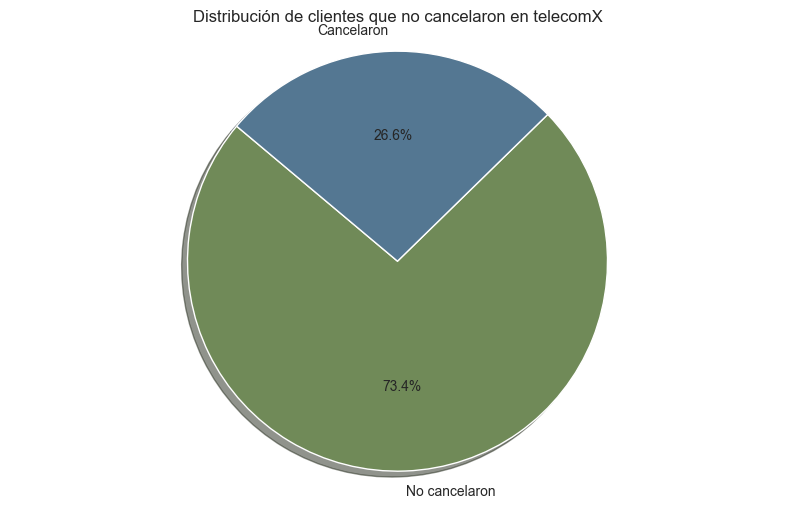

In [33]:
color = ["#708A58", "#547792"]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.pie(telecom["Cancelacion"].value_counts(), labels=["No cancelaron", "Cancelaron"], colors=color, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribución de clientes que no cancelaron en telecomX")
plt.axis("equal")
plt.show()


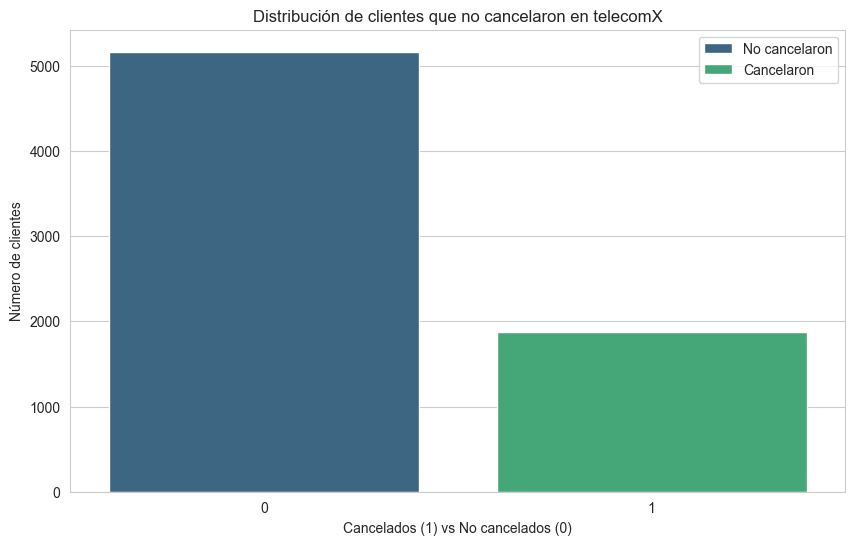

In [34]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(x="Cancelacion", data=telecom, order=telecom["Cancelacion"].value_counts().index, color = ["#EB5A3c", "#6A9C89"], palette="viridis", hue="Cancelacion")
plt.xlabel("Cancelados (1) vs No cancelados (0)")
plt.ylabel("Número de clientes")
plt.legend(["No cancelaron", "Cancelaron"])
plt.title("Distribución de clientes que no cancelaron en telecomX")
plt.show()

#### Recuento de Evasion por Variable Categorica

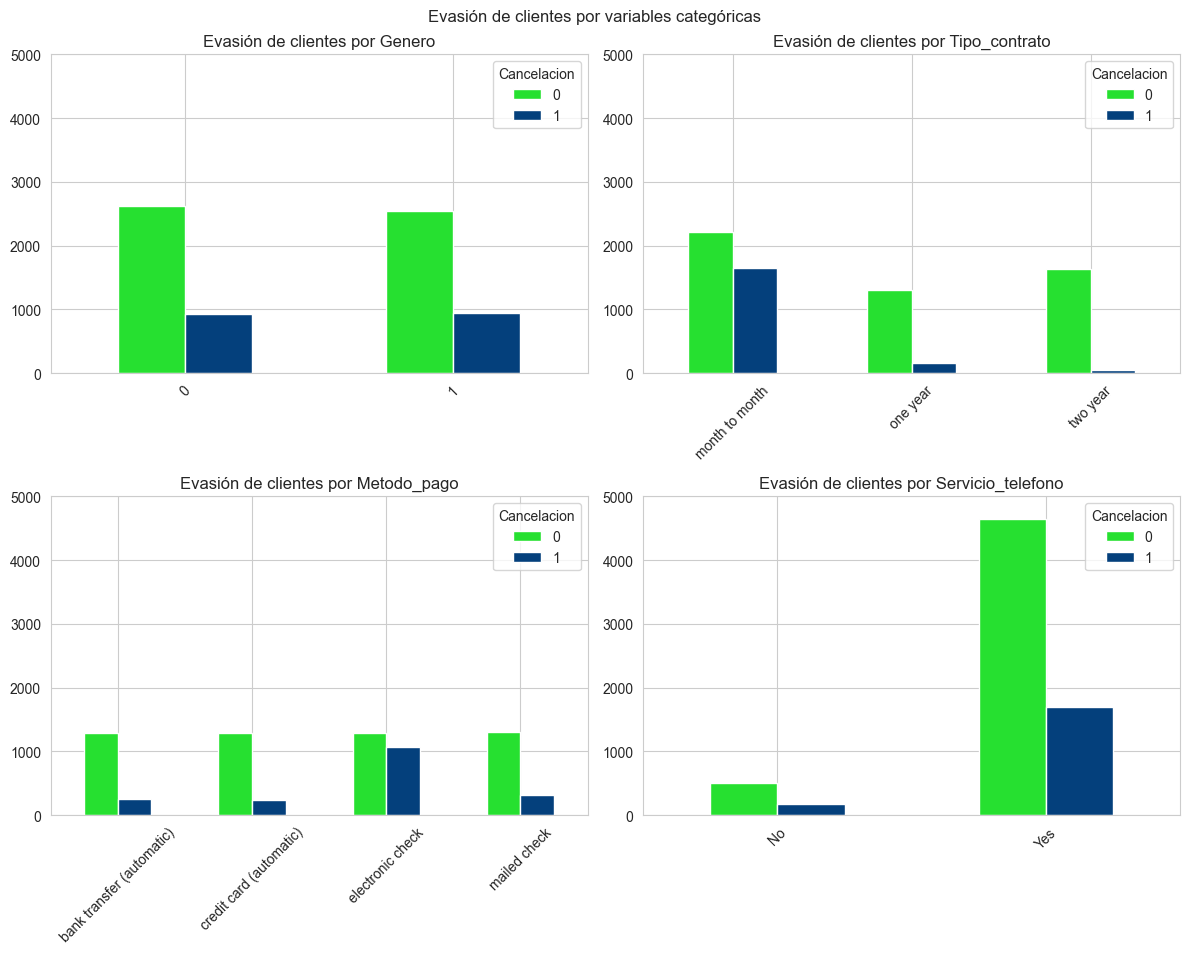

In [35]:
bar_columns = ["Genero", "Tipo_contrato", "Metodo_pago", "Servicio_telefono"]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables categóricas")
axes = ax.flatten()

for i, col in enumerate(bar_columns):
    cross = pd.crosstab(telecom[col], telecom["Cancelacion"])
    cross.plot(kind="bar", ax=axes[i], rot=45, color=["#26e030", "#04407c"])
    axes[i].set_title(f"Evasión de clientes por {bar_columns[i]}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_ylim(0, 5000)
    axes[i].legend(title="Cancelacion", labels=["0", "1"])

#plt.savefig("img/Evasion_de_clientes_por_variables_categoricas.png")
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

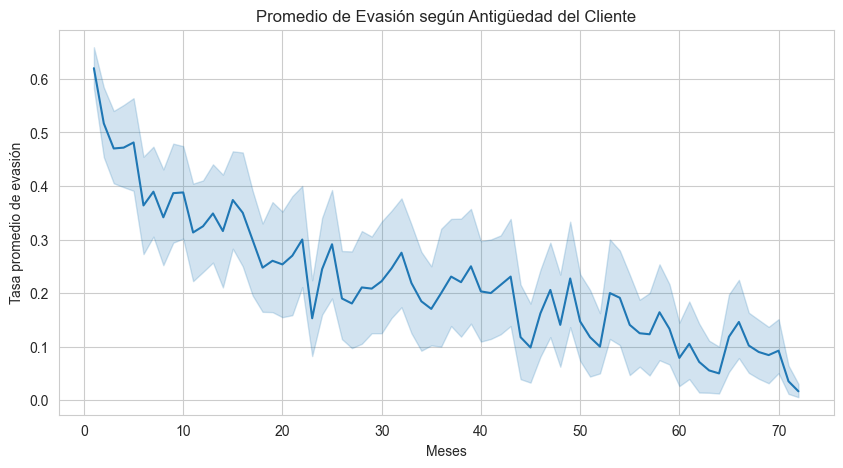

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=telecom, x='Meses_conectado', y='Cancelacion', estimator='mean')
plt.title('Promedio de Evasión según Antigüedad del Cliente')
plt.xlabel('Meses')
plt.ylabel('Tasa promedio de evasión')
plt.show()

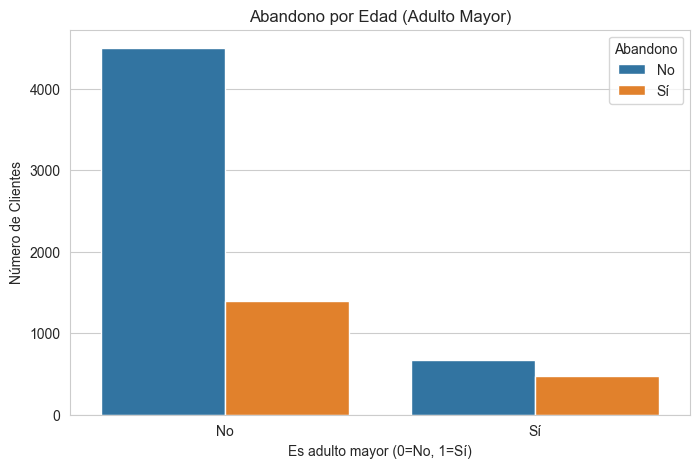

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Adulto_mayor', hue='Cancelacion', data=telecom)
plt.title('Abandono por Edad (Adulto Mayor)')
plt.xlabel('Es adulto mayor (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.legend(title='Abandono', labels=['No', 'Sí'])
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

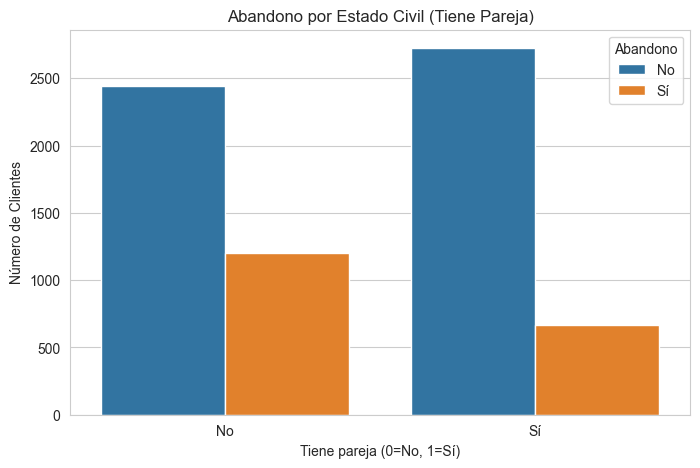

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Tiene_pareja', hue='Cancelacion', data=telecom)
plt.title('Abandono por Estado Civil (Tiene Pareja)')
plt.xlabel('Tiene pareja (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.legend(title='Abandono', labels=['No', 'Sí'])
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

<Figure size 1000x600 with 0 Axes>

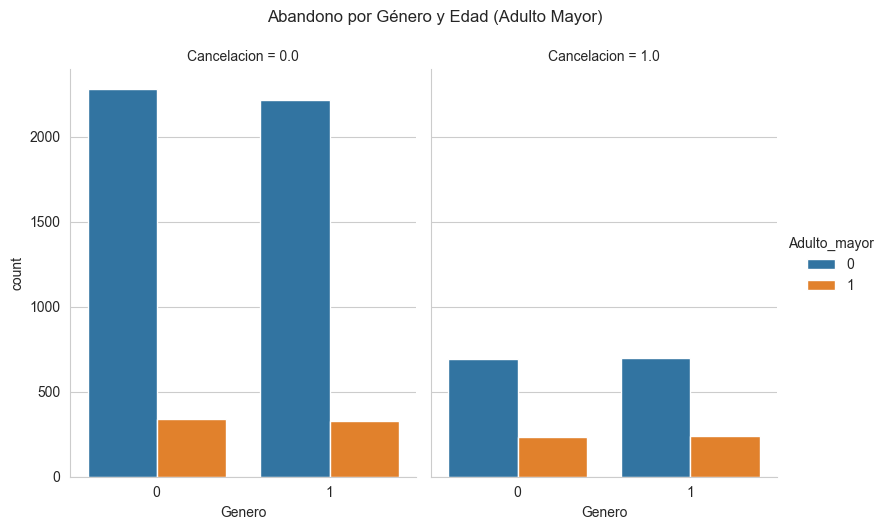

In [47]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Genero', hue='Adulto_mayor', col='Cancelacion',
            data=telecom, kind='count', height=5, aspect=0.8)
plt.suptitle('Abandono por Género y Edad (Adulto Mayor)', y=1.05)
plt.show()

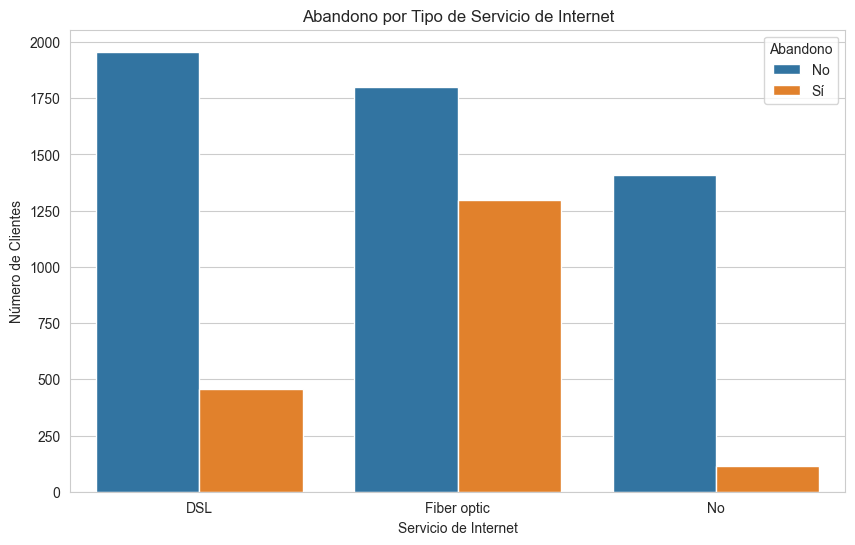

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='Servicio_internet', hue='Cancelacion', data=telecom)
plt.title('Abandono por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Abandono', labels=['No', 'Sí'])
plt.show()

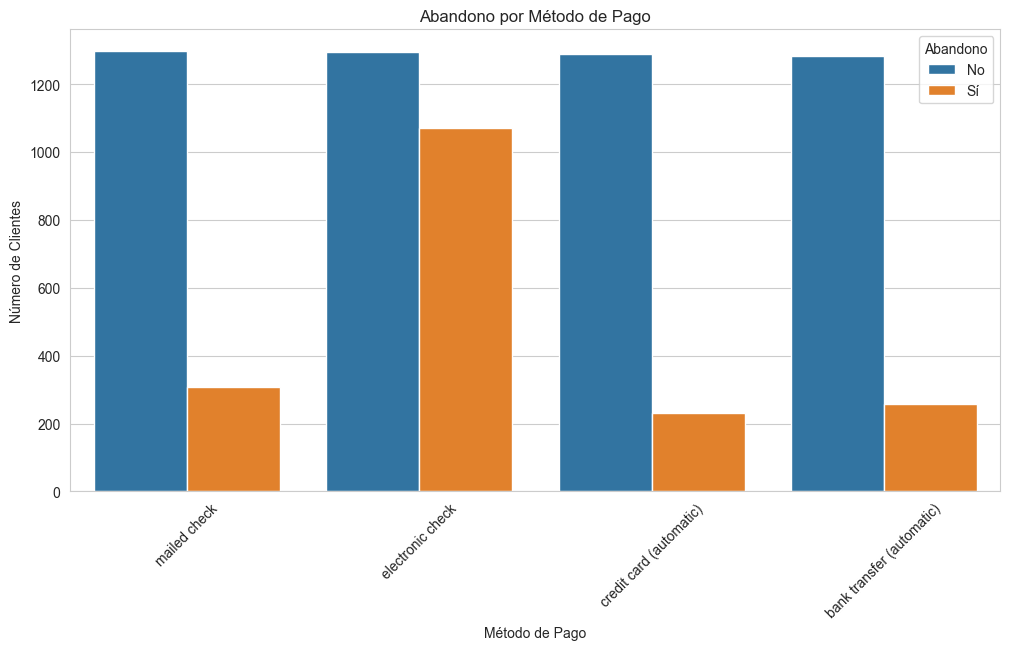

In [51]:

plt.figure(figsize=(12,6))
sns.countplot(x='Metodo_pago', hue='Cancelacion', data=telecom)
plt.title('Abandono por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.legend(title='Abandono', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()

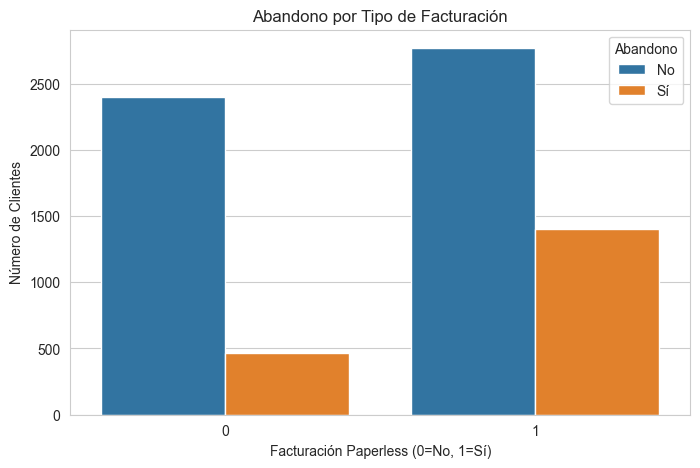

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='Factura_electronica', hue='Cancelacion', data=telecom)
plt.title('Abandono por Tipo de Facturación')
plt.xlabel('Facturación Paperless (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.legend(title='Abandono', labels=['No', 'Sí'])
plt.show()

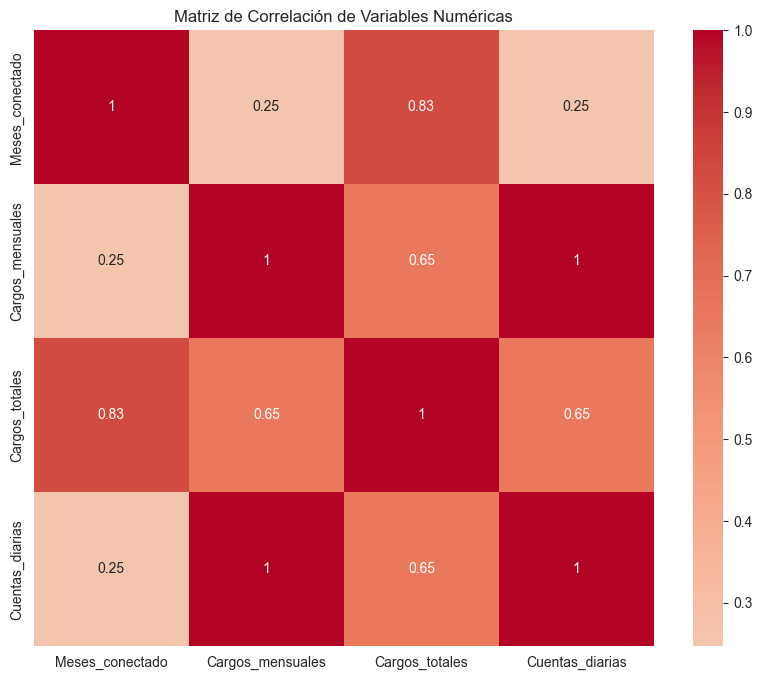

In [ ]:
columnas_numericas = ['Meses_conectado', 'Cargos_mensuales', 'Cargos_totales', 'Cuentas_diarias']
plt.figure(figsize=(10,8))
sns.heatmap(telecom[columnas_numericas].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#📄Informe final


### 📄 Informe Final: Análisis de Evasión de Clientes (Churn) en TelecomX
#### 🔹 Introducción

**El presente informe tiene como objetivo analizar y comprender el fenómeno de la evasión de clientes (Churn) en la empresa de telecomunicaciones TelecomX.**
**El Churn, o la pérdida de clientes, es uno de los mayores desafíos para las  empresas de servicios, ya que implica la pérdida de ingresos potenciales y la necesidad de invertir en la adquisición de nuevos clientes.** 
**Mediante este análisis, buscamos identificar los factores clave que influyen en la decisión de un cliente de abandonar la empresa, con el fin de desarrollar estrategias efectivas para reducir la tasa de evasión y mejorar la retención de clientes.**

#### 🔹 Limpieza y Tratamiento de Datos

**El proceso de análisis comenzó con la importación del conjunto de datos  TelecomX_Data.json utilizando la librería pandas. Se realizó una exploración  inicial de los datos para entender su estructura y contenido.**

**Los pasos clave en la limpieza y el tratamiento de datos incluyeron:**

**Carga del Dataset: Se cargó el archivo JSON en un DataFrame de pandas.**
**Renombre de Columnas: Se renombraron las columnas a nombres más descriptivos y en español para facilitar su comprensión. **
** Exploración de Tipos de Datos: Se verificaron los tipos de datos de cada columna para identificar posibles inconsistencias.**
**Tratamiento de Valores Nulos: Se identificó que la columna Cargos_totales contenía valores vacíos (' ') que representaban valores nulos. Estos valores fueron reemplazados por np.nan y la columna fue convertida al tipo numérico float64 para permitir cálculos y análisis.**
**Creación de Nueva Variable: Se creó una nueva columna, cuentas_diarias, calculando el cargo promedio diario dividiendo cuenta_cargos_total por cliente_permanencia.**

#### 🔹 Análisis Exploratorio de Datos (EDA)
**Se llevó a cabo un análisis exploratorio de datos para visualizar las distribuciones de las variables y examinar su relación con la variable objetivo Churn.**

**Distribución de Churn: Se analizó la proporción de clientes que han evadido (Yes) y los que no (No). Las visualizaciones (gráfico de pastel y gráfico de barras) mostraron que una proporción significativa de clientes ha evadido, destacando la importancia de este análisis.**

**Distribución de Evasión por Variables Categóricas: Se exploró la relación entre el Churn y variables categóricas clave:**

**Género : El análisis no mostró una diferencia significativa en la tasa de evasión entre hombres y mujeres.**
**Tipo_Contrato: Se observó que los clientes con contratos a corto plazo (Mes a Mes) tienen una tasa de evasión considerablemente más alta en comparación con aquellos con contratos a largo plazo (Un año, Dos años). Esto sugiere que la duración del contrato es un factor importante en la retención.**
**Método_de_Pago: Los métodos de pago electrónicos (Cheque Electrónico) parecen estar asociados con una mayor tasa de evasión en comparación con otros métodos.**
**Análisis de Variables Numéricas por Estado de Churn: Se examinó la distribución de las variables numéricas (cargos_totales, Meses_conectados, Cargos_mensuales) en relación con el estado de Churn.**

**Tiempo de Permanencia de clientes: Los clientes que evaden tienden a tener un tiempo de permanencia más corto. Esto es un indicador claro de que los clientes nuevos o con poco tiempo de servicio son más propensos a irse.**
**Cargos Mensuales: Los clientes con cargos mensuales más altos parecen tener una mayor probabilidad de evadir. Esto podría indicar insatisfacción con el costo del servicio.**
**Cargos Totales : De manera similar, los clientes que evaden suelen haber gastado menos en total, lo cual es coherente con tener un tiempo de permanencia más corto y potencialmente cargos mensuales más altos en relación con ese tiempo.**


#### 🔹 Conclusiones e Insights

**Los principales hallazgos de este análisis son:**
**Alta Tasa de Evasión: La proporción de clientes que evaden es significativa, lo que subraya la necesidad de abordar este problema de manera proactiva.**
**Contratos a Corto Plazo: Los clientes con contratos mensuales son los más propensos a evadir. La flexibilidad de estos contratos, si bien atractiva inicialmente, facilita el cambio a la competencia.**
**Métodos de Pago Electrónicos: La evasión es más prevalente entre los usuarios de métodos de pago electrónicos. Podría haber factores subyacentes relacionados con la experiencia del usuario con estos métodos o con el tipo de clientes que los utilizan.**
**Clientes Recientes y de Mayor Gasto Mensual: Los clientes con menos tiempo de permanencia y aquellos que pagan cargos mensuales más altos son grupos de alto riesgo de evasión.**
**Estos datos sugieren que la insatisfacción con el servicio, el costo o la falta de compromiso a largo plazo son factores clave en la decisión de evadir.**

#### 🔹 Recomendaciones

**Basado en los insights obtenidos, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes en TelecomX:**

**Programas de Retención para Contratos Mensuales: Implementar programas de fidelización específicos para clientes con contratos mensuales. Ofrecer incentivos para cambiar a contratos a más largo plazo (descuentos, servicios adicionales, etc.).**
**Mejorar la Experiencia de Clientes Nuevos: Poner especial atención en la incorporación y satisfacción de clientes durante sus primeros meses de servicio, ya que son los más propensos a evadir. Un seguimiento proactivo y soporte eficiente pueden marcar la diferencia.**
**Analizar la Satisfacción de Clientes con Cargos Mensuales Altos: Investigar las razones detrás de la alta evasión en el segmento de clientes con cargos mensuales elevados. Podría ser necesario revisar la estructura de precios o mejorar la percepción de valor del servicio.**
**Optimizar la Experiencia con Métodos de Pago Electrónicos: Investigar posibles puntos de fricción o insatisfacción asociados a los métodos de pago electrónicos. Asegurar que el proceso sea sencillo, seguro y transparente.**
**Modelos Predictivos de Churn: Desarrollar modelos predictivos utilizando estos datos para identificar proactivamente a los clientes con alto riesgo de evasión. Esto permitiría a TelecomX intervenir con ofertas de retención personalizadas antes de que el cliente decida irse.**
**Recopilar Feedback de Clientes que Evaden: Implementar un proceso para recopilar información de los clientes que deciden irse. Las encuestas de salida pueden proporcionar valiosos insights sobre las razones específicas de su decisión.**
**La implementación de estas recomendaciones, respaldadas por un monitoreo continuo de los indicadores de Churn, ayudará a TelecomX a construir relaciones más sólidas con sus clientes y a reducir la tasa de evasión, lo que se traducirá en un crecimiento sostenible a largo plazo.**